In [1]:
!pip install transformers sentencepiece diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.8 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
import torch

In [4]:
from abc import ABC, abstractmethod

In [5]:
class BaseImageCreator(ABC):

    @abstractmethod
    def create_image(self):
        pass

    @abstractmethod
    def save_image_to_path(self):
        pass

class ImageCreator(BaseImageCreator):
    def __init__(self, pipe):
        self.pipe = pipe

    def create_image(self, prompt):
        return self.pipe(prompt).images[0]

    def save_image_to_path(self, image, file_name):
        # сохраняем полученное изображение в папку с проектом
        image.save(file_name)

In [6]:
model = "runwayml/stable-diffusion-v1-5"

prompt = input("Enter prompt: ")
file_name = input("Enter file name: ")

pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype=torch.float32)
pipe = pipe.to("cpu")

creator = ImageCreator(pipe)
image = creator.create_image(prompt)
creator.save_image_to_path(image, file_name)

Enter prompt: big sun at night
Enter file name: big_sun_at_night.png


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

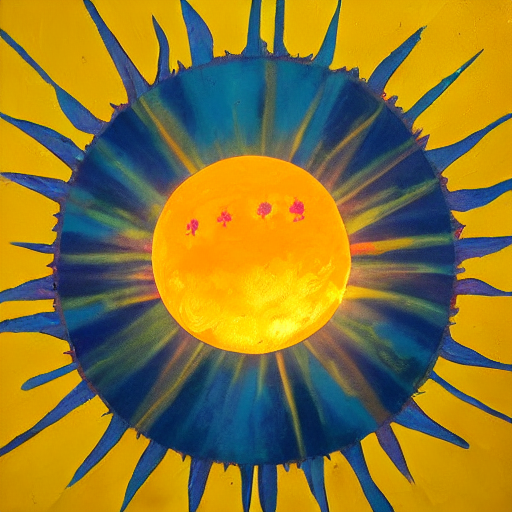

In [7]:
image